<a href="https://colab.research.google.com/github/luislauriano/Data_Science/blob/master/Machine_Learning_para_Detec%C3%A7%C3%A3o_do_C%C3%A2ncer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning para Detecção do Câncer de Mama**

O uso e a busca por novas tecnologias como Machine Leanirng, inteligência artifical e aplicações de modelos de inteligencia computacional para contribuir com diagnósticos mais rápidos e precisos tem crescido cada vez mais. Segundo a [pesquisa](https://www.femama.org.br/2018/br/noticia/o-cancer-de-mama-em-numeros) da Agência Internacional de Pesquisa em Câncer (IARC) do ano de 2018, o câncer de mama era o quinto em questão de mortalidade no mundo, sendo estimadas mais de 627 mil mortes em 2018, o que representa 6,6% do total de mortes por todos os tipos da doença. Em 2019, foram estimados 59.700 novos casos em mulheres, o que representa uma taxa de incidência de 51,29 casos por 100 mil mulheres. 

O principal objetivo do uso de tecnologias como Machine Learning é melhorar a precisão e a velocidade que são feitos os diagnósticos, sendo os diagnósticos precose da doença os principais fatores para reduzir a mortalidade por câncer. Com o diagnóstico precose as chances de curas chegam a 95%. 

Nesse projeto de Data Science foi construido um modelo de Machine Learning capaz de detectar o câncer de mama. 

Fontes de informações: 

https://www.femama.org.br/2018/br/noticia/o-cancer-de-mama-em-numeros 

https://www.inca.gov.br/sites/ufu.sti.inca.local/files/media/document/a_situacao_ca_mama_brasil_2019.pdf

#**Etapas do projeto:**

* Coleta dos dados
   1. Leitura do Arquivo
   2. Importar os pacotes e dataset necessários 
* Limpeza e preparação dos dados 
* Exploração dos dados 
* Modelagem dos dados 
* Algoritmos de Machine Learning 
* Avaliar desempenho dos modelos usando as metricas corretas 

#**Coleta dos dados**

Se você ainda não conhece o [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/index.php) você está "perdendo tempo", o UCI Machine Learning Repository é um conjunto de bancos de dados, teorias de domínio e geradores de dados usados pela comunidade de aprendizado de máquina para a análise empírica de algoritmos de aprendizado de máquina.  

Para a construção do modelo de Machine Learning foi usado o banco de dados Wisconsin, disponibilizado no Repositório de Machine Learning da UCI.

O conjunto de dados que será utilizado nesta análise também está disponivel no kaggle, faça o dowload através desse [link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/tasks).

###**Leitura do arquivo**

O conjunto de dados que vamos utilizar é um arquivo no formato CSV contendo 569 entradas, 32 colunas e os dados estão separados por vírgula, onde as observações foram obtidas por meio da aspiração com agulha fina de células da mama. Importante salientar que a variável alvo pode ser classificada em benigna ou maligna.

###**Importar os pacotes e dataset necessários**

Nosso arquivo em CSV será importado para uma estrutura DataFrame utilizando a biblioteca pandas para manipular e análisar os dados. 

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# configurar o notebook
sns.set_style()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Com os pacotes necessários importados, vamos agora importar o nosso arquivo que está no formato CSV para um dataframe

In [2]:
dados = 'https://raw.githubusercontent.com/luislauriano/Data_Science/master/Datasets/dados_diag_cancer.csv'
df = pd.read_csv(dados, sep = ',')

#**Limpeza e preparação dos dados**

A primeira coisa que precisamos fazer após importar o dataset é verificar e examinar com cautela as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados. 

**Informações sobre os atributos**:
* A coluna **id** representa o número de identificação.
* A coluna **diagnosis** é a variável alvo(o que quremos prever).
     * M - Maligno
     * B - Benigno
* Radius representa a média das distâncias do centro aos pontos do perímetro
* Texture representa o desvio padrão dos valores da escala de cinza 
* Perimeter (Perímetro) 
* Area (Área)
* Smoothness_mean representa a variação local nos comprimentos do raio
* Compactness representa o perímetro ^2 / area - 1.0)
* Concavity representa a severidade das porções côncavas do contorno 
* Concave points representa o número de porções côncavas do contorno
* symmetry_mean 
* fractal_dimension representa a aproximação da costa - 1 

Uma característica é um número de identificação (ID), outro é o diagnóstico de câncer, e 30 são as medidas laboratoriais numéricas. O diagnóstico é codificado como “M” para indicar maligno ou “B” para indicar benigno.

Vamos começar verificando a dimensão do nosso conjunto de dados.

In [3]:
#Dimensão do DF 

print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 569
Colunas: 33


Como dito anteriormente as primeiras 5 entradas do conjunto de dados já permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###**Deletar colunas**

Irei deletar uma coluna que apresenta erro e as que não são relevantes para o projeto. 

In [5]:
df = df.drop(['id', 'Unnamed: 32'], axis = 'columns')

###**Verificar os tipos das colunas**

É importante verificar os tipos das colunas, caso uma coluna  esteja no formato que não é o adequado, como uma coluna no formato string que deveria ser int. 

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Com exceção da coluna diagnosis e id, todas as outras são do tipo numérica (float). 

###**Verificar dados ausentes ou faltantes**

Como já é de costume em todo projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, principalmente em projetos que envolvem Machine Learning, pois o output é o reflexo direto do input. 

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Como o nosso conjunto de dados não contém valores ausentes e não foi encontrado nem um problema com o conjunto de dados, não vamos gastar muito tempo com a limpeza dos dados. Mas lembre-se que um dos processos que podem levar mais tempo para um Cientista de Dados, é realizar a limpeza e a preparação das informações.

#**Análise Exploratória**

Inicialmente irei verificar como está o balanceamento do dataset de acordo com a variável alvo, **diagnosis**.  

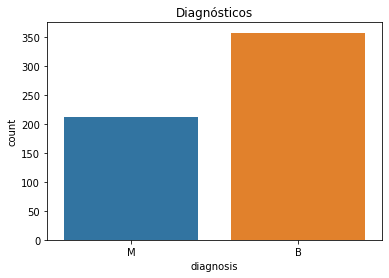

Diagnósticos: 
B    357
M    212
Name: diagnosis, dtype: int64


In [8]:
plt.figure()
ax = sns.countplot('diagnosis', data=df)
ax.set_title('Diagnósticos')
plt.show()

print('Diagnósticos: ')
print(df["diagnosis"].value_counts())

O ideal seria o dataset ser mais balanceado, possuir um equilíbrio entre os registros da coluna. Como possue 569 registros na coluna Diagnosis, o ideal seria obter uma média de 284 para Benigno e 284 para Maligno.

Ao criar um modelo de machine learnig, antes de definir as variáveis de entrada e saída é importante analisar á correlação das variáveis e como elas estão distribuidas. Saber algo como variação, desvio padrão, número de amostra (contagem) ou valores máximos mínimos. Esse tipo de informação ajuda a entender o que está acontecendo nos dados.

Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas.

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Assim fica muito dificil visualizar e retirar alguma informação devido ao grande número de colunas. Com um gráfico heatmap a visualização fica melhor.

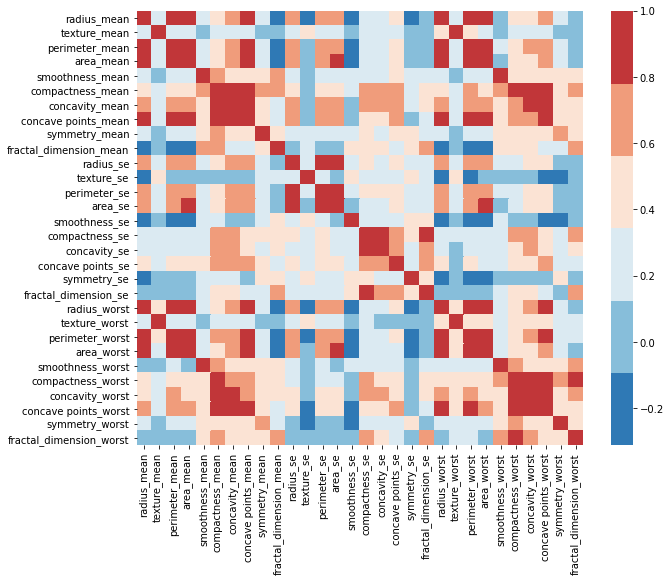

In [11]:
plt.figure(figsize=(10,8))

sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", n_colors=6))

plt.show()

#**Preparação dos dados**

Como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, irei usar o StardardScaler, que vem junto com sklearn.preprocessing, para padronizar os dados numéricos.

Isso será feito devido que a nossa variável alvo é categórica, onde M representa os tumores malignos e B os benignos. Usando LabelEncoder será capazes de converter variáveis categóricas em numéricas e alimentar o modelo adequadamente.


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

No fim do código, como em todo projeto de Machine Learning, o dataset foi dividido em dados de treino e teste. Agora de fato vai ser possivel construir o modelo. 

#**Modelo de Machine Learning para detecção do câncer de mama**

Soluções de Machine Learning para detecção do câncer de mama precisa ser alimentada com diversas variáveis independentes, ou seja, diversos dados de entrada, para poder classificar corretamente um tumor entre benigno e maligno.

Será utilizado um modelo do tipo Random Forest (Floresta Aleatória) devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

In [13]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)

# treinando o modelo 
ml_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

O algoritmo Random Forest, que usa métodos ensemble, é responsável por criar uma combinação de várias árvores de decisão, uma "floresta" literalmente, verificando qual combinação apresenta melhor desempenho e acurácia.

#**Desempenho do modelo de detecção de câncer de mama**

Lembre-se de se atentar aos seus dados e a confiança que você construiu para o modelo, preparando e explorando os dados, até chegar na previsão do modelo. Por que nem sempre uma excelente acurácia vai significar que seu modelo está bom. A qualidade e confiança da previsão do modelo está diretamente ligada ao dados de entrada que foram passados. 

Além da métrica de acurácia vou usar a função classification_report para ver ver o desempenho do modelo sobre as métricas de precisão, recall, f1-score e support.

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9707602339181286

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.95      0.97      0.96        60

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Nota-se que o modelo está com ótimos valores nas métricas consideradas. Mas como foi dito anteriormente, nem sempre uma excelente acurácia vai significar que seu modelo está bom

Pra finalizar vamos observar uma matriz de confusão. Exemplificando, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

In [15]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,108,3
pos,2,58


O modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 96% e lidou muito bem com ambas as classes.

Avanços e buscas por melhores tecnologias ocorrem a todo momento, principalmente na área da saúde. O uso do Machine Learning é de extrema importância para ajudar cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos concencionais e diminuição da taxa de mortalidade.